# Aplicação do Algoritmo _Google_ PageRank em Páginas do Wikipédia

<center>SALLES, Eduardo. eadamesalles@gmail.com <br> PINTUCCI, Rodrigo. rodrigoghp@gmail.com </center>

## Introdução

Este relatório tem como objetivo apresentar diversas abordagens do PageRank tais como: o contexto no qual fora criado, o desenvolvimento de seu algorítmo, sua implementação em _Python_ e sua aplicação em um conjunto de dados criado a partir de _web scraping_. O _Google_ PageRank foi uma solução desenvolvida principalmente por Larry Page, co-fundador do _Google_, para solucionar problemas relacionados a indexação de websites. Desde então, esse algoritmo ganhou muita notoriedade e mérito por ser eficaz e veloz. Sua implementação, de modo geral, utiliza conceitos discutidos durante a disciplina de Álgebra Linear, para qual esse relatório é dedicado.

Para a utilização de _web scraping_, nós utilizaremos ferramentas modernas em _Python_ para adquirir e armazenar dados da Wikipédia, criando nossa "micro internet". O trabalho todo é baseado em notebooks, utilizando como módulo principal o `numpy` e suas funções do `numpy.linalg`, além do `pandas` e `bs4` para a aquisição do conjunto de dados.

Nosso trabalho é ordenado nos seguintes tópicos:

1. A Motivação
2. Funcionameto do Algoritmo
3. Implementação Computacional
4. Aquisição do Conjunto de Dados
5. Aplicação do Algoritmo

## A Motivação

Desde que a Internet tornou-se amplamente acessível, motores de busca foram criados, com o intuito de facilitar a procura de informação. Contudo, apenas uma lista com todos os demais sites não é o suficiente: idealmente, os resultados devem ser dispostos de forma eficiente, na qual opções cuja relevância atendem melhor o usuário são apresentados com maior destaque.
Decorrente disso, muitas empresas foram criadas com o objetivo de estruturar um algoritmo rápido e eficaz.



### _Google_

Dentre essas empresas, foi criada o _Google_, em janeiro de 1996. O _Google_ foi projetado por dois estudantes da Universidade de Stanford, localizada na Califórnia: Larry Page e Sergey Brin; com uma missão: organizar a informação mundial e torná-la acessível e útil. 
No mercado da época, já existiam alguns buscadores, tais como _Wandex_, _WebCrawler_ e _Dogpile_. O que Larry e Sergey perceberam, entretanto, foi que esses buscadores convencionais utilizavam como parâmetro a contagem de vezes que os termos de buscas eram presentes na primeira página, e que esse era possível o desenvolvimento de um melhor método.
Assim, iniciaram uma tecnologia que fosse capaz de analisar a relação entre os sites, cujo nome é uma homenagem a seu criador: o _PageRank_.


### PageRank

Através da Internet, temos acesso a uma grande teia de documentos inter-relacionados de hipertextos, denominada _World Wide Web_ (WWW). O diferencial presente no algoritmo de _PageRank_ e a grande sacada de seus criadores é que essa interconectividade poderia e deveria ser um fator importantíssimo para o ranqueamento de sites. Dessa forma, ao invés da quantidade de termos de busca, a relevância de um site é baseada com relação a quantidade e importância de outros, aqueles capazes de realizar uma ligação de volta ao site original.


### Outras aplicações

Por mais que seja comumente associado à sua finalidade original de ranquear páginas para o _Google_, o algoritmo matemático pode ser utilizado em qualquer tipo de rede ou grafo. Alguns usos atuais para o _PageRank_ se encontram em:
* Bibliometria 
* Previsões e recomendações de links
* Análise de sistemas de redes rodoviárias
* Predição do número de pessoas em certas ruas e espaços.
* Análise de redes sociais e de informações
  * O *Twitter* utiliza do algoritmo para apresentar aos usuários outras contas relevantes.
* Ciências tais como biologia, química, física e neurocîencia.
  * Na biologia, é utilizado na análise de redes de proteína.
  * Na ecologia, uma versão do algoritmo pode determinar quais espécies são essencias para um ecossistema.
  * Na neurociência, temos em uma rede neural a correlação do _PageRank_ de um neurônio com sua taxa de disparo relativa.
* Outras áreas
  * Nos esportes, já foi utilizado para ranquear a performance de times e jogadores, tais como os times da _National Football League_, dos Estados Unidos.
  * Na semântica lexical, foi utilizado para performar desambiguação e similaridade de semântica.

## O Algoritmo

Para compreender como o _PageRank_ funciona, vamos examinar uma situação onde nossa rede é composta de apenas 4 sites: $A$, $B$, $C$ e $D$ e temos um hipotético usuário que caminha de um site para o outro sem preferências.
Uma característica dessa tecnologia é que a soma de todos os _PageRank_ é $1$. Portanto, inicialmente, todos tem _PageRank_ igual a $0,25$.
<!-- spaces -->
<img src="img/ABCD1.png" width="300" height="300"/>

Vamos supor agora que eles estejam conectados de alguma forma entre si. Para melhor visualização, as conexões de um site consigo mesmo e o caminho de duas vias foi oculto. Nessa primeira situação, os sites $B$, $C$ e $D$ resultam unicamente em $A$. Assim, o _PageRank_ de $A$ pode ser calculado como a soma do _PageRank_ dos demais sites:
<!-- spaces -->
<img src="img/ABCD2.png" width="300" height="300"/>
<!-- spaces -->
$$PR(A) = PR(B) + PR(C) + PR(D)$$

Contudo, geralmente os sites não apontam para um único local. Portanto, vamos supor que os sites $B$, $C$ e $D$ também tem conexões entre si.
<!-- spaces -->
<img src="img/ABCD3.png" width="300" height="300"/>
<!-- spaces -->

Observe que o site $B$ tem 3 conexões, enquanto o site $C$ tem 2 conexões e o site $D$ apenas 1. Voltemos a nosso hipotético usuário: caso ele se encontre no site $C$, pode tanto ir para $A$ quanto para $D$. Como ele não possui preferências, a chance para que vá para um desses sites é igual. Dessa forma, no cálculo do _PageRank_ de $A$, já não podemos considerar o valor total do _PageRank_ de $C$; e sim apenas metade. O mesmo ocorre para o valor proveniente do _PageRank_ de $B$. Nessa situação, o valor proveniente de $D$ permanece o mesmo pois possui apenas uma conexão.
Portanto, temos:

$$PR(A) = \displaystyle \frac{PR(B)}{3} + \frac{PR(C)}{2} + \frac{PR(D)}{1}$$

Podemos, então, generalizar essa conta: o _PageRank_ de um site vai ser a soma entre a razão do _PageRank_ de sites que referenciam o site original e o número de ligações contidos nesses outros sites. Assim, considerando o número de ligações do site $B$ o número $L(B)$ temos:
<!-- spaces -->
$$PR(A) = \displaystyle \frac{PR(B)}{L(B)} + \frac{PR(C)}{L(C)} + \frac{PR(D)}{L(D)}$$
<!-- spaces -->
Para um número qualquer de sites, podemos utilizar a seguinte notação de somatória:
<!-- spaces -->
$${\displaystyle PR(u)=\sum _{v\in B_{u}}{\frac {PR(v)}{L(v)}}}$$
<!-- spaces -->
(sendo $B_u$ o conjunto de páginas que referenciam $u$)

### Erros

O sistema descrito é funcional para a maioria das situações. Porém, duas situações devem ser consideradas: a drenagem e o ciclo.


Voltemos na segunda imagem. Como descrito anteriormente, as ligações saindo de $A$ e as ligações de um site consigo mesmo foram ocultadas.
Vamos supor, entretanto, que as ligações saindo de $A$ não foram ocultadas, e sim que realmente não existem.
Dessa forma, o usuário hipotético entraria eventualmente em $A$ e seria incapaz de sair. Se analisarmos o _PageRank_, notaríamos que $A$ causou uma drenagem nos demais valores.
<!-- spaces -->
<img src="img/ABCD2.png" width="300" height="300"/>

A outra situação é quando temos um ciclo fechado, onde cada site possui uma unica ligação e eventualmente chegamos no site inicial.
<!-- spaces -->
<img src="img/ABCD4.png" width="300" height="300"/>
<!-- spaces -->
Nesse caso, temos que $A$ aponta somente para $B$, que por sua vez aponta somente para $C$, que aponta somente para $D$ e que por fim aponta somente para $A$. Assim, o nosso usuário hipotético fica preso nesse ciclo infinito.

### A solução

Para solucionar esses erros, adicionamos uma ideia em nosso algoritmo: a que o usuário hipotético pode cansar de ir para para outro site a partir de uma referência e, a qualquer momento, pode visitar qualquer site, sem preferência.
Portanto, denominamos de $d$ um fator de amortecimento: a probabilidade, contida entre 0 e 1, de que o usuário irá seguir a ideia inicial apresentada.

 Analogamente, temos que a probabilidade de que o usuário decida acessar qualquer site aleatoriamente será de $(1 - d)$. Como definimos que é aleatório, a chance para cada site nessa segunda escolha é equivalente, e portanto temos $\frac{(1 - d)}{N}$, sendo $N$ o número total de sites.  
Concluímos assim que o cálculo do _PageRank_ pode ser dado da seguinte maneira:
<!-- spaces -->
$$PR(p_i) = \displaystyle \frac{(1 - d)}{N} + d{\sum _{p_j\in M{p_i}}{\frac {PR(p_j)}{L(p_j)}}}$$
<!-- spaces -->
(com $M(p_i)$ sendo o conjunto de páginas que referenciam $p_i$)

### _PageRank_ como um problema de Álgebra Linear

Vamos agora analisar como podemos utilizar de matrizes para facilitar o cálculo de nosso algoritmo.
O primeiro passo será transformar o cálculo genérico numa linguagem vetorial, para que tenhamos simultaneamente o cálculo de todos os _PageRanks_. 
Assim, denominamos $\mathbf {R}$ o vetor contendo o _PageRank_ dos sites $p_1$ até $p_n$.

Voltando ao nosso exemplo composto de 4 sites mais simples, no qual ainda não havia o fator de amortecimento, temos que $PR(A) = \frac{PR(B)}{L(B)} + \frac{PR(C)}{L(C)} + \frac{PR(D)}{L(D)}$. Podemos reescrever esse segundo membro como o resultado de um produto entre o vetor linha  $\begin{bmatrix}\frac{1}{L(B)} & \frac{1}{L(C)} & \frac{1}{L(D)}\end{bmatrix}$ e o vetor coluna $\mathbf {R}$, o que novamente equivale a $PR(A)$. Agora, imagine que pegamos todos os vetores linhas para os demais sites e montamos uma matriz $\mathcal {M}$. O resultado do produto dessa matriz agora não seria mais $PR(A)$, e sim um vetor composto de todos os _PageRanks_: o vetor $\mathbf {R}$!

Porém, dois pontos devem ser levados em consideração: o primeiro, é que um site pode não ter referência para outro, e o segundo é que o fator de amortecimento está ausente da equação.
Para o primeiro ponto, vamos alterar a matriz $\mathcal {M}$ para que cada elemento seja uma função do tipo $\ell(p_i,p_j)$, que pode assumir dois valores: 0, caso não haja referência de $p_j$ para $p_i$, ou $\frac{1}{L(p_j)}$ caso haja.
Para o segundo ponto, basta multiplicar a matriz $\mathcal {M}$ pelo fator de amortecimento $d$ e adicionar um vetor coluna de tamanho n composto de elementos $\frac{(1-d)}{N}$
Assim, temos o seguinte resultado:
<!-- spaces -->

$${\displaystyle \mathbf {R} = \begin{bmatrix}PR(p_{1})\\PR(p_{2})\\\vdots \\PR(p_{N})\end{bmatrix}  ={\begin{bmatrix}{(1-d)/N}\\{(1-d)/N}\\\vdots \\{(1-d)/N}\end{bmatrix}}+d{\begin{bmatrix}\ell (p_{1},p_{1})&\ell (p_{1},p_{2})&\cdots &\ell (p_{1},p_{N})\\\ell (p_{2},p_{1})&\ddots &&\vdots \\\vdots &&\ell (p_{i},p_{j})&\\\ell (p_{N},p_{1})&\cdots &&\ell (p_{N},p_{N})\end{bmatrix}}\mathbf {R} }$$

Se tirarmos em evidência $\frac{(1-d)}{N}$ do primeiro vetor, temos um vetor composto apenas de 1. Podemos aproveitar o fato de que todos os _PageRanks_ somam 1 para reescrever esse vetor como o produto $\mathbf {ER}$, sendo $\mathbf {E}$ um matriz composta apenas de 1, ou seja:
<!-- spaces -->

$$\displaystyle \begin{bmatrix}{(1-d)/N}\\{(1-d)/N}\\\vdots \\{(1-d)/N}\end{bmatrix} = \frac{(1-d)}{N}\begin{bmatrix}{1}\\{1}\\\vdots \\{1}\end{bmatrix} = \frac{(1-d)}{N}ER$$

Dessa forma, todos os termos estão multiplicados pelo vetor coluna $R$, de forma que podemos mais uma vez tirar o fator em evidência:
<!-- spaces -->

$$\displaystyle \mathbf {R} = (\frac{(1-d)}{N}\mathbf {E} + d \mathcal {M}) \mathbf {R}$$

Se chamarmos $(\frac{(1-d)}{N}\mathbf {E} + d \mathcal {M})$ de $\widehat {\mathcal {M}}$, temos:
<!-- spaces -->
$$\displaystyle \mathbf {R} = \widehat {\mathcal {M}} \mathbf {R}$$
<!-- spaces -->
De onde tiramos que $\mathbf{R}$ **é um autovetor de** $\widehat {\mathcal {M}}$ **para o autovalor 1**.


Temos que os elementos da matriz $\widehat {\mathcal {M}}$ são não-negativos e que suas colunas somam 1 (ou em alguns casos raros, 0). Dessa forma, essa matriz é estotástica, ou seja, seu maior autovalor é 1. Conseguimos concluir assim que a matriz $\mathbf{R}$ de _PageRank_ é o **autovetor do maior autovalor** da matriz $\widehat {\mathcal {M}}$.

Portanto, um método para o cálculo de _PageRank_ é:
1. Descobrir os autovalores da matriz $\widehat {\mathcal {M}}$.
2. Encontrar, dentre eles, o maior.
3. Encontrar o autovetor para esse autovalor.
<!-- spaces -->

Contudo, esse método não é usual para matrizes muito grandes, pois demanda bastante poder computacional para descobrir todos seus autovalores.

### Método das potências

Podemos, contudo, utilizar das equações que encontramos para calcular um método de aproximar o vetor de _PageRank_ sem ter de calcular os autovalores da matriz.
Quando se tem uma matriz $A$ tal que um de seus autovalores é estritamente maior que os outros e temos um vetor $b_0$ que tem um componente não-nulo na direção do autovetor relacionado ao maior autovalores, temos a seguinte propriedade, denominada _Power Method_ ou _Power Iteration_:
<!-- spaces -->
$${\displaystyle b_{k+1}={\frac {Ab_{k}}{\|Ab_{k}\|}}}$$
<!-- spaces -->
Onde o vetor $b_0$ converge para o autovetor relacionado ao maior autovalor de $A$. Isso ocorre quando ele é multiplicado pela matriz, normalizado e o processo é repetido uma certa quantidade de vezes.  

Devido às propriedades da matriz $\widehat {\mathcal {M}}$ (estocástica, primitiva e irredutível), e sabendo que $R$ é justamente o autovetor relacionado ao maior autovalor dessa matriz, sabemos que podemos então utilizar esse método para aproximar o valor de $\mathbf{R}$ sem ter de calcular todos os autovalores.
<!-- spaces -->
Essas propriedades também fazem com que não seja necessário normalizar cada iteração, uma vez que esta etapa serve apenas para evitar um crescimento descontrolado do vetor.

Podemos iniciar com um vetor $\mathbf{R}_0$, onde as entradas são equivalentes; de valor $\frac{1}{N}$, sendo $N$ o número total de sites.
Assim, escrevemos:
<!-- spaces-->
$${\displaystyle \mathbf{R}_{k+1}={\widehat {\mathcal {M}}}\mathbf{R}_k}$$

Fazendo isso, podemos comparar a norma da diferença entre $\mathbf{R}_{k+1}$ e $\mathbf{R}_k$ até que ele seja menor que um valor escolhido muito pequeno.
<!-- spaces -->
Se tivermos $\displaystyle |\mathbf{R}_{k+1}-\mathbf{R}_k| \lt\epsilon$, então sabemos que os valores de $\mathbf{R}_{k+1}$ convergiram para valores muitos próximos ao do vetor $\mathbf{R}$ encontrado pelo método do autovetor.

Logo, encontramos os dois métodos que estaremos utilizando e comparando.

## Implementação Computacional
Agora, vamos ver como podemos automatizar a execução do algortimo através de programação. Nesse caso, iremos utilizar o _Python_. Entretanto, é necessário primeiro importar sua biblioteca `numpy` para podermos trabalhar com matrizes.

In [1]:
import numpy as np
import numpy.linalg as la

Isto feito, podemos criar as funções que serão utilizadas. Inicialmente, mostraremos o funcionamento em uma matriz gerada automaticamente. Eventualmente, estaremos utilizando redes retiradas da Internet. 
### Gerando uma matriz

In [2]:
def fake_internet(n):
    #############################
    ### CRIA MATRIZ APLICÁVEL ###
    #############################
    
    # Cria matriz do tamanho n x n com colunas de 0, 1, ..., n-1.
    c = np.full([n,n], np.arange(n))
    
    # Transforma a matriz em booleanos aleatórios com base na desigualdade abaixo.
    c = (abs(np.random.standard_cauchy([n,n])/2) > (np.abs(c - c.T) + 1))
    
    # Transforma True em conexões e depois faz as colunas somarem 1.
    c = (c+1e-10) / np.sum((c+1e-10), axis=0)
    return c

Assim, criamos uma matriz quadrada do tamanho que quisermos na qual as colunas somam 1. Portanto, é uma candidata funcional para a aplicação dos métodos de _PageRank_ que visualizamos. Vamos criar uma variável `matrix` para guardar o valor da Internet que criamos.

In [3]:
matrix = fake_internet(4)
matrix

array([[2.5e-01, 1.0e-10, 5.0e-01, 5.0e-11],
       [2.5e-01, 1.0e-10, 5.0e-11, 5.0e-11],
       [2.5e-01, 1.0e+00, 5.0e-11, 5.0e-01],
       [2.5e-01, 1.0e-10, 5.0e-01, 5.0e-01]])

Agora, o primeiro método que foi explicado: vamos calcular todos os autovalores e autovetores presentes na matriz criada. Depois, organizamos os autovalores em ordem decrescente e utilizamos esta mesma ordem para os autovetores. Podemos, portanto, remover o primeiro autovetor dessa lista: será o autovetor correspondente ao maior autovelor, e portanto, o _PageRank_ da matriz.
### Utilizando os algoritmos

In [4]:
def eigPageRank(linkMatrix):
    ################################
    ### PAGERANK POR AUTOVETORES ###
    ################################
    
    # Calcula os autovalores e autovetores
    eVals, eVecs = la.eig(linkMatrix) 
    
    # Ordena pelos autovalores
    order = np.absolute(eVals).argsort()[::-1] 
    eVals = eVals[order]
    eVecs = eVecs[:,order]
    
    # r é o principal autovetor
    r = eVecs[:, 0] 
    
    # Faz o vetor somar um (e multiplica por 100 pra melhorar legibilidade).
    return 100 * np.real(r / np.sum(r)) 

Utilizando essa função em nossa matriz, temos:

In [5]:
eigPageRank(matrix)

array([21.05263158,  5.2631579 , 31.57894737, 42.10526315])

Contudo, como vimos, podemos aproximar também através de iterações. Iniciamos com um vetor $r$, que tem todas as entradas iguais e a soma é 1. Realizamos a multiplicação da _matriz_ por $r$ e atualizamos o valor de $r$ até que a norma da diferença entre duas iterações seja menor que um número extremamente pequeno.

In [6]:
def dotPageRank(M):
    #############################
    ### PAGERANK POR ITERAÇÃO ###
    #############################
    
    # Armazena a quantidade de colunas
    n = M.shape[0]
    
    # Vetor (n linhas 1/n × 100 cada)
    r = 100 * np.ones(n) / n 
    
    # Altera o valor do último r
    last = r
    
    # Efetua o dotproduct
    r = M @ r
    
    # Repete o processo até atender o erro arbitrário.
    while la.norm(last - r) > 0.01 :
        last = r
        r = M @ r
    return r

Se aplicarmos esse método em nossa matriz, temos:

In [7]:
dotPageRank(matrix)

array([21.05171085,  5.26457429, 31.57846332, 42.10525154])

Perceba que os resultados são bem semelhantes. Porém, ainda temos como aprimorar esse processo, como vimos anteriormente. Introduzimos então o fator de amortecimento $d$, para que o sistema seja eficiente em situações de drenagens ou ciclos. Usualmente, o fator de amortecimento utilizado é de 85%.

In [8]:
def dotPageRankD(linkMatrix, d) :
    #############################
    ### PAGERANK POR ITERAÇÃO ###
    #############################
    
    # Armazena a quantidade de colunas
    n = linkMatrix.shape[0]
    
    # Cria matriz M a partir do fator de amortecimento.
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    
    # Vetor (n linhas 1/n × 100 cada)
    r = 100 * np.ones(n) / n 
    
    # Altera o valor do último r
    last = r
    
    # Efetua o dotproduct
    r = M @ r
    
    # Repete o processo até atender o erro arbitrário.
    while la.norm(last - r) > 0.01 :
        last = r
        r = M @ r
    return r

Por fim, testaremos esse novo processo em nossa matriz:

In [9]:
dotPageRankD(matrix, 0.85)

array([21.87046479,  8.39676658, 31.69856198, 38.03420665])

Devido à aleatoriedade, vemos que os valores são alterados significantemente. Contudo, o importante, ou seja, o ranqueamento do _PageRank_ dos 4 sites, segue equivalente aos outros métodos.

## Adquirindo o Conjunto de Dados

Para utilizarmos o nosso algorítmo decidimos criar o nosso próprio _dataset_ a partir de _web scraping_. 

Para isso, os pacotes abaixo serão necessários.

In [1]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import requests
import re
from urllib.parse import urlparse, urldefrag
from bs4 import BeautifulSoup as bs

Caso não haja familiaridade com os módulos além de `numpy` e `pandas`. Os módulos `requests`, `re`, e `urllib` já estão disponíveis por padrão no _Python_. Eles, respectivamente, fazem requisições _http_, tratam expressões regulares e permitem _url parsing_.

A classe `BeautifulSoup` do módulo `bs4` permite, de forma geral, o _web scraping_.

A nossa ideia de aquisição de dados foi, primeiramente escolher uma página da wikipédia como ponto inicial e adquirir todos seus links (e os links dentro das páginas desses links). Após isso, entrar em cada um desses links, filtrar por essa primeira listagem adquirida, agrupar as contagens (ver quais se repetem e quantas vezes) e depois calcular a probabilidade de você clicar em cada um dos links ao clicar em um aleatóriamente para cada página.

Desse modo teremos uma matriz quadrada que atende nossos requisitos.

### Definindo funções

A função abaixo retorna um _dataframe_ com os links de um _url_ específico.

In [2]:
def get_df(url: str):
    ################
    ### SCRAPING ###
    ################
    
    # Requisitando a página.
    raw_page = requests.get(url)
    
    # Adquirindo seu HTML.
    html_page = raw_page.text
    
    # Criando o objeto scrapper.
    soup = bs(html_page, 'lxml')
    
    # Capturando todos os links que levam à própria Wikipédia.
    links = soup.findAll('a', attrs= {'rel': 'mw:WikiLink'})
    
    # Criando lista com os links.
    data = [link.get('href') for link in links]
    
    # Criando dataframe a partir desses dados.
    df = pd.DataFrame(data, columns = ['link'])
    
    return df

Agora, essa função adiciona uma coluna de probabilidade no dataframe retornado pela função anterior, também recebe o seu _link_.

In [3]:
def find_probs(url: str, df: pd.DataFrame): 
    #####################
    ### PROBABILIDADE ###
    #####################
    
    # Retirando fragmento da url
    df['link'] = df['link'].apply(lambda x: urldefrag(x)[0])
    
    # Contabilizando quantas referências a cada link o site possui. 
    df = df.groupby(['link']).size().reset_index(name='count')
    
    # Criando a identificação da coluna a partir da url (padronizar).
    title = url.replace('https://pt.wikipedia.org/api/rest_v1/page/html', '.')
    
    # Criando essa coluna de probabilidades identificada pelo site.
    df[title] = df['count']/df['count'].sum()
    
    return df[['link', title]]

Já que iremos filtrar a "nossa internet", essa função retorna um _dataframe_ com todos os links de uma _url_ recebida. Vale notar que pode-se escolher uma "profundidade". No nosso caso será 1, ou seja, capturará todos os links de todos os links da `url` inicial.

In [4]:
def get_links(url: str, depth: int):
    #############################################
    ### CAPTURA TODOS OS LINKS PROFUNDIDADE n ###
    #############################################
    
    # Requisitando a página.
    raw_page = requests.get(url)
    
    # Adquirindo seu HTML.
    html_page = raw_page.text
    
    # Criando o objeto scrapper.
    soup = bs(html_page, 'lxml')
    
    # Capturando todos os links que levam à própria Wikipédia.
    links = soup.findAll('a', attrs= {'rel': 'mw:WikiLink'})
    
    # Criando set com links. (Removendo o #param)
    link_set = {urldefrag(link.get('href'))[0] for link in links}
    
    
    if depth > 0:
        for link in link_set:
            # Transformando link em absoluto
            full_link = link.replace('./', 'https://pt.wikipedia.org/api/rest_v1/page/html/') 
            # Recursividade
            new_link_set = get_links(full_link, depth -1)
            # Unindo os sets
            link_set = set.union(link_set, new_link_set)
        
        # Adicionando url original ao set
        title = url.replace('https://pt.wikipedia.org/api/rest_v1/page/html', '.')
        link_set.add(title)
        
        # Criando dataframe a partir desse set.
        link_filter = pd.DataFrame(link_set, columns = ['link'])

        return link_filter
    else:
        return link_set
    

Essa é a função principal. Nela, a criação do _dataframe_ final é realizada. Ela recebe aquela primeira _url_ utilizada (somente para ser a primeira coluna) e a lista de _links_, para ser utilizada como filtro.

In [5]:
def scraping_loop(first_url: str, link_filter: pd.DataFrame):
    ####################################
    ### LOOP PRINCIPAL DE SCRAPING 2 ###
    ####################################
    
    # Referenciando ao set que contém todos os links
    all_links = set()
    
    # Adicionando o link principal a esse set
    all_links.add(first_url)
    
    # Encontra os links (e suas probabilidades) para a url inicial
    links_df = get_df(first_url)
    links = find_probs(first_url, links_df)
    
    # Cria uma cópia para ser retornada após merge
    main_frame = links.copy()
    
    # Itera entre os links da url principal
    for link in link_filter['link']:
        
        # Transformando a url relativa para a absoluta.
        full_link = link.replace('./', 'https://pt.wikipedia.org/api/rest_v1/page/html/')
        
        # Checa se o link já foi utilizado
        if full_link in all_links:
            continue
        else:
            # Adiciona ao set de links o link
            all_links.add(full_link)
            
            # Cria o df para esse link
            df = get_df(full_link)
            
            # Filtra os links para conter somente os de nossa internet
            df = df[df['link'].isin(link_filter['link'])]
            
            # Cria a coluna (df) de probabilidades.
            probs = find_probs(full_link, df) 
            
            # Faz um outer join com o main_frame
            main_frame = pd.merge(main_frame, probs, how='outer', on='link')
            
    return main_frame.fillna(0)

### Procedimento de aquisição

Nas linhas abaixo, discorriremos sobre o procedimento utilizado, a partir das funções previamente definidas.

Primeiramente, escolhemos uma _url_.

In [6]:
url = 'https://pt.wikipedia.org/api/rest_v1/page/html/Álgebra_linear'

Depois, encontraremos a lista de _links_, que servirá de filtro. Veja que é necessário 29.8 segundos para executar essa função.

In [7]:
%%time
links = get_links(url, 1)

CPU times: user 11 s, sys: 154 ms, total: 11.1 s
Wall time: 29.8 s


Enfim, podemos criar o nosso _dataframe_ final. Que também é possível ver que foi-se 1h25min para a execução da função.

In [8]:
%%time
df = scraping_loop(url, links)

CPU times: user 1h 10min 46s, sys: 7.11 s, total: 1h 10min 53s
Wall time: 1h 25min 59s


Para garantir que a matriz seja quadrada, podemos remover as colunas remanescentes.

In [11]:
# Removemos a coluna de link do df
df2 = df.drop(columns = ['link'])
# Verificamos se há mais colunas que linhas.
cols = list(df2.columns[~df2.columns.isin(df['link'])])

In [12]:
# Se houver colunas remanescentes, as removemos
if cols != []:
    wiki = df.drop(columns = cols)

Buscando não ter que executar novamente essas funções anteriores, podemos exportar, de forma compactada nosso _dataframe_.

In [13]:
wiki.to_csv("datasets/wikipedia.gzip",compression='gzip', index=False)

Em seguida, criamos nosso `np.array`

In [14]:
wiki_array = np.array(wiki.drop(columns = ['link']))

Verificamos suas dimensões.

In [15]:
wiki_array.shape

(7060, 7060)

Pelo mesmo motivo anterior, também exportamos o _array_.

In [16]:
with open('datasets/wiki_db.npz', 'wb') as f:
    np.savez_compressed(f, wiki_array)

### Como recuperar os dados

Para utilizar os dados a partir das exportações feita anteriormente é muito simples.

No caso do `numpy`, o exemplo abaixo deve ser seguido.

In [17]:
wiki_saved = np.load('datasets/wiki_db.npz')['arr_0']

Podemos confirmar se as colunas de fato somam 1 ou 0.

In [23]:
# Somatório das colunas
somatory = np.sum(wiki_saved,axis =0)

Vemos abaixo os valores únicos. Note que há 1 repetidos, por conta de arredondamentos, nada que alterará nossos algorítmos.

In [24]:
np.unique(somatory)

array([0., 1., 1., 1., 1., 1., 1.])

Para o `pandas`, é parecido. Veja:

In [ ]:
df_saved = pd.read_csv('datasets/wikipedia.gzip', compression='gzip')

## Aplicação do _PageRank_ em nosso conjunto de dados

Como visto anteriormente, nosso conjunto de dados relaciona 7060 sites. Portanto, seguiremos com a aplicação dos algorítmos.

Para isso, precisaremos dos seguintes módulos.

In [1]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import networkx as nx # Utilizado para criar grafos
import matplotlib.pyplot as plt # Utilizado para plots num geral

### Recuperando e visualizando os dados

Vamos, portanto, adquirir a _array_ do `numpy` e o _dataframe_ do `pandas`.

In [2]:
L = np.load('datasets/wiki_db.npz')['arr_0']
df = pd.read_csv('datasets/wikipedia.gzip', compression='gzip')

Agora podemos, com auxílio dos pacotes `networkx` e `matplotlib`, visualizar em forma de grafos nosso _dataset_.
Para isso, criamos o objeto grafo a partir de nossa matriz.

In [3]:
%%time
G = nx.from_numpy_array(L)

CPU times: user 1.49 s, sys: 54.9 ms, total: 1.54 s
Wall time: 1.54 s


Veja abaixo como estão as relações dos grafos. Decidimos por retirar os nós e reduzir a opacidade das linhas para ter-se melhor entendimento. Pode-se ver que, muito possivelmente devido aos assuntos serem próximos e/ou páginas de auxílio da Wikipédia, há uma grande concentração de conexões em comum. Embora haja uma quantidade razoável de nós fora desse núcleo.

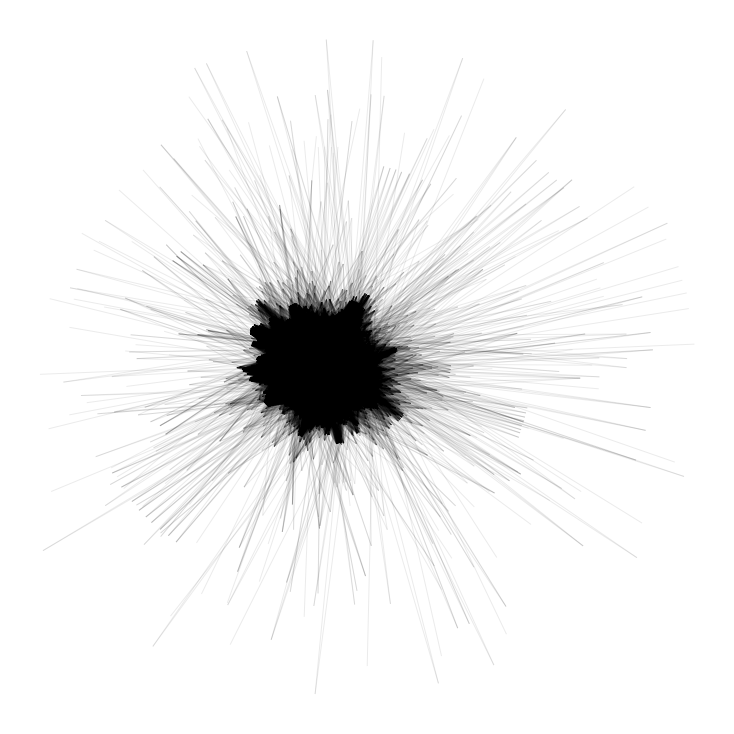

In [69]:
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=False, node_size=0, alpha=0.08)
plt.savefig('graph.png')
plt.show()

Relembre as funções definidas anteriormente:

In [4]:
def eigPageRank(linkMatrix):
    ################################
    ### PAGERANK POR AUTOVETORES ###
    ################################
    
    # Calcula os autovalores e autovetores
    eVals, eVecs = la.eig(linkMatrix) 
    
    # Ordena pelos autovalores
    order = np.absolute(eVals).argsort()[::-1] 
    eVals = eVals[order]
    eVecs = eVecs[:,order]
    
    # r é o principal autovetor
    r = eVecs[:, 0] 
    
    # Faz o vetor somar um (e multiplica por 100 pra melhorar legibilidade).
    return 100 * np.real(r / np.sum(r))

def dotPageRankD(linkMatrix, d) :
    #############################
    ### PAGERANK POR ITERAÇÃO ###
    #############################
    
    # Armazena a quantidade de colunas
    n = linkMatrix.shape[0]
    
    # Cria matriz M a partir do fator de amortecimento.
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    
    # Vetor (n linhas 1/n × 100 cada)
    r = 100 * np.ones(n) / n 
    
    # Altera o valor do último r
    last = r
    
    # Efetua o dotproduct
    r = M @ r
    
    # Repete o processo até atender o erro arbitrário.
    while la.norm(last - r) > 0.01 :
        last = r
        r = M @ r
    return r

### Aplicando os algorítmos

Vamos utilizar ambos os algorítmos apresentados em seções anteriores e depois relacioná-los com o _dataframe_. 

Primeiramente, utilizando o método dos autovetores.

In [5]:
%%time
eigPR = eigPageRank(L)

CPU times: user 4min 35s, sys: 1min 12s, total: 5min 47s
Wall time: 1min 8s


Em seguida, o método do _dot-product_.

In [6]:
%%time
dotPR = dotPageRankD(L, 1) # Utilizando 1 para fazer uma comparação.

CPU times: user 1.15 s, sys: 261 ms, total: 1.41 s
Wall time: 652 ms


Observe-os

In [7]:
eigPR

array([5.51433066e-01, 2.52080379e-02, 8.63712287e-02, ...,
       1.34295455e-06, 4.37247323e-07, 4.37247323e-07])

In [8]:
dotPR

array([3.14136484e-03, 1.43603365e-04, 4.92033500e-04, ...,
       7.65044842e-09, 2.49087959e-09, 2.49087959e-09])

Os valores são, de fato, bem diferentes. Mas vamos ver quais páginas eles apontam como mais bem ranqueadas.

Vamos, para cada um dos resultados, criar um _dataframe_ que une o resultado com os sites.

In [13]:
# Removendo a coluna link do df
df2 = df.drop(columns = ['link'])
# Adquirindo os sites
cols = list(df2.columns)

In [14]:
# Método dos autovetores
rel_eig = pd.DataFrame(eigPR, cols)

In [15]:
# Método do dotproduct
rel_dot = pd.DataFrame(dotPR, cols)

Agora podemos visualizar os primeiros 15 resultados de cada um dos _dataframes_ ordenados.

In [21]:
# Método dos autovetores
rel_eig.sort_values(0, ascending=False)[0:15]

,0
./Especial:Fontes_de_livros/978-0-07-709840-7,1.998577
./Emil_Artin,1.800438
./Universidade_de_Poitiers,1.495650
./Árvore_(grafo),1.212889
./Special:BookSources/8573930217,1.044034
./Dualidade,0.878467
./Wikimedia,0.712887
./Conexidade,0.706123
./Função_de_Heaviside,0.669221
./Função_côncava,0.657430


In [22]:
# Método do dotproduct
rel_dot.sort_values(0, ascending=False)[0:15]

,0
./Especial:Fontes_de_livros/978-0-07-709840-7,0.011385
./Emil_Artin,0.010257
./Universidade_de_Poitiers,0.008520
./Árvore_(grafo),0.006910
./Special:BookSources/8573930217,0.005948
./Dualidade,0.005004
./Wikimedia,0.004061
./Conexidade,0.004023
./Função_de_Heaviside,0.003812
./Função_côncava,0.003745


Como pode-se ver, há os mesmos resultados em ambos. Agora vamos visualizar até que ponto eles se mantém iguais.

In [23]:
# Valores ranqueados do método dos autovalores
top_eig = rel_eig.sort_values(0, ascending=False).index
# Valores ranqueados do método do dotproduct
top_dot = rel_dot.sort_values(0, ascending=False).index
# Lista com as posições dos erros
errors = []
# Posição inicial pra ser iterada
pos = 0
for eig, dot in zip(top_eig, top_dot):
    if eig == dot:
        pos +=1
        continue
    else:
        pos +=1
        errors.append(pos)

Agora vemos as informações sobre esses erros.

In [24]:
info = f"""
Quantidade: {len(errors)}
Menor Posição: {errors[0]}
Maior Posição: {errors[-1]}
"""
print(info)


Quantidade: 1610
Menor Posição: 680
Maior Posição: 7059



Vendo as informações antigas, podemos ver que, para o erro menor que 0.01 arbitrário que colocamos na função, conseguimos igualdade nos primeiros 680 resultados. De certo modo, é absurdamente raro alguém alcançar essa página ao fazer uma busca. Portanto, é um resultado muito satisfatório, principalmente ao comparar 679 ms com 1min 8s.

Evidentemente, é muito melhor ter uma busca extremamente rápida que atende a imensa maioria das buscas perfeitamente que ter uma busca extremamente demorada que mal aumenta a qualidade da busca.

Além do mais, outro fator importante que, entre a posição 680 e a posição 7059, há somente 1610 discrepâncias. Ou seja, dentre os últimos 6379 sites, há 25% de variação na posição. O que não é necessáriamente ruim.

Por fim, também é possivel diminuir ainda mais o erro permitido sem comprometer tanto a velocidade da busca.

### Adicionando fator de aleatoriedade

Como vimos que o método do _dotproduct_ é eficiente, podemos utilizá-lo com o parâmetro de aleatoriedade. O que siginifca que assumimos que um usuário pode simplesmente escolher uma outra página do nosso universo e acessá-la pelo campo de url. Normalmente usa-se 15% de probabilidade pelos motores de busca, ou seja, o fator de amortecimento utilizado é de 85%.

In [25]:
%%time
rdotPR = dotPageRankD(L, .85) # Adicionando 15% de chance dele acessar um outro site.

CPU times: user 1.43 s, sys: 678 ms, total: 2.11 s
Wall time: 785 ms


Os valores aparentam ter se alterado, observe.

In [26]:
rdotPR

array([4.26159319e-03, 2.42903149e-04, 6.05301389e-04, ...,
       2.56811254e-05, 2.57428341e-05, 2.57428341e-05])

Mas para saber a verdade, teremos que criar um _dataset_ a relacionando com os links.

In [27]:
rel_rdot = pd.DataFrame(rdotPR, cols)

Já podemos ver que, de fato, já há algumas alterações nas posições.

In [28]:
rel_rdot.sort_values(0, ascending=False)[0:15]

,0
./Especial:Fontes_de_livros/978-0-07-709840-7,0.015413
./Emil_Artin,0.013404
./Universidade_de_Poitiers,0.011170
./Árvore_(grafo),0.009325
./Special:BookSources/8573930217,0.008020
./Dualidade,0.006822
./Conexidade,0.005750
./Wikimedia,0.005256
./Função_de_Heaviside,0.004999
./Função_côncava,0.004895


Agora, usaremos da mesma lógica aplicada entre os dois métodos para verificar as discrepâncias.

In [29]:
# Valores ranqueados do método do dotproduct sem aleatoriedade
top_dot = rel_dot.sort_values(0, ascending=False).index
# Valores ranqueados do método do dotproduct com aleatoriedade
top_rdot = rel_rdot.sort_values(0, ascending=False).index
# Lista com as posições das diferenças
diff = []
# Posição inicial pra ser iterada
idx = 0
for eig, dot in zip(top_dot, top_rdot):
    if eig == dot:
        idx +=1
        continue
    else:
        idx +=1
        diff.append(idx)

In [30]:
info = f"""
Quantidade: {len(diff)}
Menor Posição: {diff[0]}
Maior Posição: {diff[-1]}
"""
print(info)


Quantidade: 7019
Menor Posição: 7
Maior Posição: 7060



Como se pode ver, embora as primeiras posições não sejam alteradas, há uma variação enorme entre os dois. É importante esclarecer que nesse caso não se tratam de erros, pois o método utilizado adota essa aleatoriedade como verdade. Mas vejamos se os 60 primeiros são parecidos, por exemplo:

In [37]:
top_60_dot = rel_dot.sort_values(0, ascending=False).index[:60]
top_60_rdot = rel_rdot.sort_values(0, ascending=False).index[:60]

# Diferença simétrica.
len(top_60_dot[~top_60_rdot.isin(top_60_dot)])

7

Somente 7 de variação, ou seja, embora aparente uma grande mudança, dentre os 60 primeiros sites, a maioria das mudanças são entre esse próprio conjunto.

## Conclusão 

Por fim, temos que esse algoritmo é, de fato, muito importante para a computação. Além de ser eficiente tanto em velocidade quanto em ranquear de forma satisfatória, ele ser alimentado por conceitos conhecidos de Álgebra Linear é algo extremamente benéfico de se estudar. Conseguimos, de modo geral, aplicar diversos conceitos aprendidos não somente ao longo da disciplina, mas unir ferramentas abordadas ao longo do curso.

Fomos muito felizes em conseguir aplicar o projeto em um conjunto de dados totalmente único e original. Inclusive, é de nosso interesse manter público esse método de aquisição de dados. Trabalhamos em conjunto utilizando o JupyterLab hospedado pela EMAp e versionamento Git/GitHub. A maior dificuldade foi lidar com as quase 50 milhões de entradas em nossa matriz, que nos forçava esperar por algum tempo para receber resultados de alguns testes. Entretanto, essa quantidade relativamente grande de dados nos permitiu enxergar de fato o quão rápido o _Power Method_ é em relação ao _Eigen Method_. Enfim, esperamos que o trabalho tenha sido satisfatório.

## Referências

Patel, Kamlesh. (2014). Improve Page Rank Algorithm using Normalized Technique. International Journal of Data Warehousing and Mining. 4. 42-47. 

David Austin Grand Valley State University. (2006). How Google Finds Your Needle in the Web's Haystack. The American Mathematical Society. Disponível em: <http://www.ams.org/publicoutreach/feature-column/fcarc-pagerank>.

Wikipédia, a enciclopédia livre. (2021). PageRank. Disponível em: <https://en.wikipedia.org/wiki/PageRank>.